# Dylan Fox, Stiven LaVrenov, Basanta Subba, and Daniel Farone

## Data Dive 4: Can we estimate a customer's income from their store profile?

In [1]:
#get required libraries
import numpy as np
import pandas as pd
#More defined graph output for bar plots,etc.
import seaborn as sns
import matplotlib.pyplot as plt
#For Decision Tree
from sklearn import tree
#Runs the regression decision tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
#Allows us to find the accuracy of a decision tree and split into testing data
from sklearn.model_selection import train_test_split, cross_val_score
#Disaplys the useful results of the regression decision tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#Read in our customers dataframe from kaggle.com
#https://www.kaggle.com/imakash3011/customer-personality-analysis
customers = pd.read_csv('customers.csv', encoding = "ISO-8859-1", index_col = 0)
customers.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0
9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,...,7,0,0,0,0,0,0,3,11,1


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

### Some cleansing within the columns

In [4]:
#Some of the entries have NaN in the income columns, so we will drop these entries
customers = customers.dropna()

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null 

In [6]:
#Z_contact and Z_revenue have the same value for every entry, so we will drop these columns
customers = customers.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)
# We will also drop Marital_Status and Dt_Customer since there are many varying entries
# We do not believe these will be effective in estimating income
customers = customers.drop(['Marital_Status','Dt_Customer'],axis = 1)

In [7]:
# Delete outliers from income field
# Get row indexes for rows where income is more than $ 150000.00
index_names = customers[customers['Income'] > 150000.00].index

In [8]:
# Delete these row indexes from dataframe
customers.drop(index_names, inplace=True)

In [9]:
# Get row indexes for rows where price is less than $ 12000.00
index_names = customers[customers['Income'] < 12000.00 ].index

In [10]:
# Delete these row indexes from dataframe
customers.drop(index_names, inplace=True)

In [11]:
# Delete outliers from year field because they are not old enough to give accurate and useful data
# Get row indexes for rows where year is greater than 2006
index_names = customers[customers['Year_Birth'] > 2006.00].index

In [12]:
# Delete these row indexes from dataframe
customers.drop(index_names, inplace=True)

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 5524 to 9405
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2173 non-null   int64  
 1   Education            2173 non-null   object 
 2   Income               2173 non-null   float64
 3   Kidhome              2173 non-null   int64  
 4   Teenhome             2173 non-null   int64  
 5   Recency              2173 non-null   int64  
 6   MntWines             2173 non-null   int64  
 7   MntFruits            2173 non-null   int64  
 8   MntMeatProducts      2173 non-null   int64  
 9   MntFishProducts      2173 non-null   int64  
 10  MntSweetProducts     2173 non-null   int64  
 11  MntGoldProds         2173 non-null   int64  
 12  NumDealsPurchases    2173 non-null   int64  
 13  NumWebPurchases      2173 non-null   int64  
 14  NumCatalogPurchases  2173 non-null   int64  
 15  NumStorePurchases    2173 non-null 

### Seperate "Education" into dummy variables

In [14]:
#We think education may impact income, so we will split the column into dummy variables
customers['Education'].value_counts()

Graduation    1098
PhD            473
Master         359
2n Cycle       194
Basic           49
Name: Education, dtype: int64

In [15]:
dummies = pd.get_dummies(customers[['Education']])

In [16]:
dummies.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
ID,,,,,
5524,0,0,1,0,0
2174,0,0,1,0,0
4141,0,0,1,0,0
6182,0,0,1,0,0
5324,0,0,0,0,1


In [17]:
customers = customers.drop(['Education'], axis = 1)

In [18]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 5524 to 9405
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Education_2n Cycle    2173 non-null   uint8
 1   Education_Basic       2173 non-null   uint8
 2   Education_Graduation  2173 non-null   uint8
 3   Education_Master      2173 non-null   uint8
 4   Education_PhD         2173 non-null   uint8
dtypes: uint8(5)
memory usage: 27.6 KB


In [19]:
customers = pd.concat([customers,dummies], axis = 1)

In [20]:
customers.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,0,0,1,0,0
2174,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,0,1,0,0
4141,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
6182,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
5324,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,0,0,1


### Transform "Kidhome" and "Teenhome" into Categorical Variables

In [21]:
#Create an array to change Kidhome column from quantitative to cateogrical stating whether a customer has kids or not
# Any value greater than or equal to 1 will be changed to 1
kids = []
for customer in customers['Kidhome']:
    if customer >= 1:
        kids.append(1)
    else:
        kids.append(0)        

In [22]:
customers = customers.drop(['Kidhome'], axis = 1)
customers['Kidhome'] = kids

In [23]:
#Create an array to change Teenhome column from quantitative to cateogrical stating whether a customer has teens or not
# Any value greater than or equal to 1 will be changed to 1
teens = []
for customer in customers['Teenhome']:
    if customer >= 1:
        teens.append(1)
    else:
        teens.append(0)


In [24]:
customers = customers.drop(['Teenhome'], axis = 1)
customers['Teenhome'] = teens

In [25]:
customers.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Kidhome,Teenhome
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,0,0,1,0,0,0,0
2174,1954,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,0,1,0,0,1,1
4141,1965,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,0,1,0,0,0,0
6182,1984,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,0,1,0,0,1,0
5324,1981,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,0,0,0,1,1,0


### Divide "Income" into 5 ranges:

In [26]:
#creates an array of the different income ranges to add to the dataframe
income_range = []
#individual lists to store the customer incomes into the 4 different ranges 
incomes0 = []
incomes1 = []
incomes2 = []
incomes3 = []
#number of customers in each income group
for customer in customers['Income']:
    #0: < $25,000
    if customer <= 25000:
        income_range.append(0)
        incomes0.append(customer)
    #$1: 25,000 - 50,000 
    elif customer > 25000 and customer <= 50000:
        income_range.append(1)
        incomes1.append(customer)
    #2: $50,000 - 75,000
    elif customer > 50000 and customer <= 75000:
        income_range.append(2)
        incomes2.append(customer)
    #3: > $75,000
    else:
        income_range.append(3)
        incomes3.append(customer)

In [60]:
#Number of people in each group
counts = [len(incomes0), len(incomes1), len(incomes2), len(incomes3)]

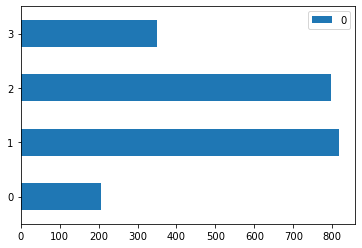

In [62]:
#bar plot of the number of customers in each income range

df_counts = pd.DataFrame(counts)
df_counts.plot(kind="barh")

In [27]:
#store the averages of each income group in an array to display a bar plot for better visualization
averages =[]
def Average(lst):
    return sum(lst) / len(lst)

averages.append(Average(incomes0))
averages.append(Average(incomes1))
averages.append(Average(incomes2))
averages.append(Average(incomes3))

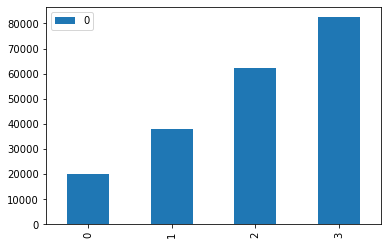

In [28]:
#Bar plot for the average income for each income_range group
A=pd.DataFrame(averages) 
A.plot(kind='bar')

In [29]:
customers['Income_Range'] = income_range

In [30]:
#We will drop income since we are predicting income_range
customers = customers.drop(['Income'],axis = 1)

In [31]:
customers['Income_Range']

ID
5524     2
2174     1
4141     2
6182     1
5324     2
        ..
10870    2
4001     2
7270     2
8235     2
9405     2
Name: Income_Range, Length: 2173, dtype: int64

In [32]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year_Birth            2173 non-null   int64
 1   Recency               2173 non-null   int64
 2   MntWines              2173 non-null   int64
 3   MntFruits             2173 non-null   int64
 4   MntMeatProducts       2173 non-null   int64
 5   MntFishProducts       2173 non-null   int64
 6   MntSweetProducts      2173 non-null   int64
 7   MntGoldProds          2173 non-null   int64
 8   NumDealsPurchases     2173 non-null   int64
 9   NumWebPurchases       2173 non-null   int64
 10  NumCatalogPurchases   2173 non-null   int64
 11  NumStorePurchases     2173 non-null   int64
 12  NumWebVisitsMonth     2173 non-null   int64
 13  AcceptedCmp3          2173 non-null   int64
 14  AcceptedCmp4          2173 non-null   int64
 15  AcceptedCmp5          2173 non-null   int64
 16  Acc

### Means of how much was spent on each of the 6 products

In [33]:
#Create an array of the means for 'MntFruits','MntSweetProducts','MntFishProducts','MntGoldProds','MntMeatProducts','MntWines'
#If we are able to predict a customer's income range just from these products, which ones may be most important to a focused marketing strategy
product_means = []
for column in customers[['MntFruits','MntSweetProducts','MntFishProducts','MntGoldProds','MntMeatProducts','MntWines']]:
    product_means.append(customers[column].mean())

Text(0.5, 1.0, 'Average Amounts Bought for Each of the 6 Products')

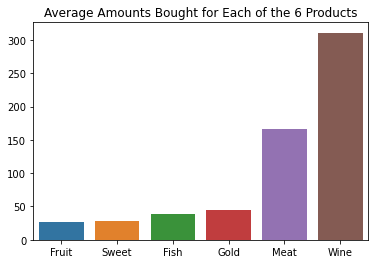

In [63]:
product_mean_bar = sns.barplot(['Fruit','Sweet','Fish','Gold','Meat','Wine'], product_means)
product_mean_bar.set_title('Average Amounts Bought for Each of the 6 Products')

### Decision Tree
##### Code contributed from Dr. Seipel's DATA 1500 course Python7.ipynb

In [35]:
#Copy the customers dataframe for our decision tree
customers1 = customers.copy()

In [36]:
# Create target variable
y = customers1.Income_Range
# Dropping the target variable to create the matrix of predictors x
x = customers1.drop('Income_Range', axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 5524 to 9405
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year_Birth            2173 non-null   int64
 1   Recency               2173 non-null   int64
 2   MntWines              2173 non-null   int64
 3   MntFruits             2173 non-null   int64
 4   MntMeatProducts       2173 non-null   int64
 5   MntFishProducts       2173 non-null   int64
 6   MntSweetProducts      2173 non-null   int64
 7   MntGoldProds          2173 non-null   int64
 8   NumDealsPurchases     2173 non-null   int64
 9   NumWebPurchases       2173 non-null   int64
 10  NumCatalogPurchases   2173 non-null   int64
 11  NumStorePurchases     2173 non-null   int64
 12  NumWebVisitsMonth     2173 non-null   int64
 13  AcceptedCmp3          2173 non-null   int64
 14  AcceptedCmp4          2173 non-null   int64
 15  AcceptedCmp5          2173 non-null   int64
 16  Acc

In [37]:
# Split the data set into a training set and a test set in which training set consists of 70% of the data and the remaining data on the test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [58]:
y_test.value_counts()
counts = y_test.value_counts()
print(counts)

1    245
2    232
3    111
0     64
Name: Income_Range, dtype: int64


In [40]:
#Begin creating regression decision tree
reg_tree = DecisionTreeRegressor()
reg_tree = reg_tree.fit(x_train, y_train)

In [41]:
# Training accuracy of our decision tree
score_train = reg_tree.score(x_train, y_train)
print(score_train)
print("")

1.0



In [42]:
# Calculating testing accuracy of our decision tree
score_test = reg_tree.score(x_test, y_test)
print(score_test)
print("")

0.5875416187420546



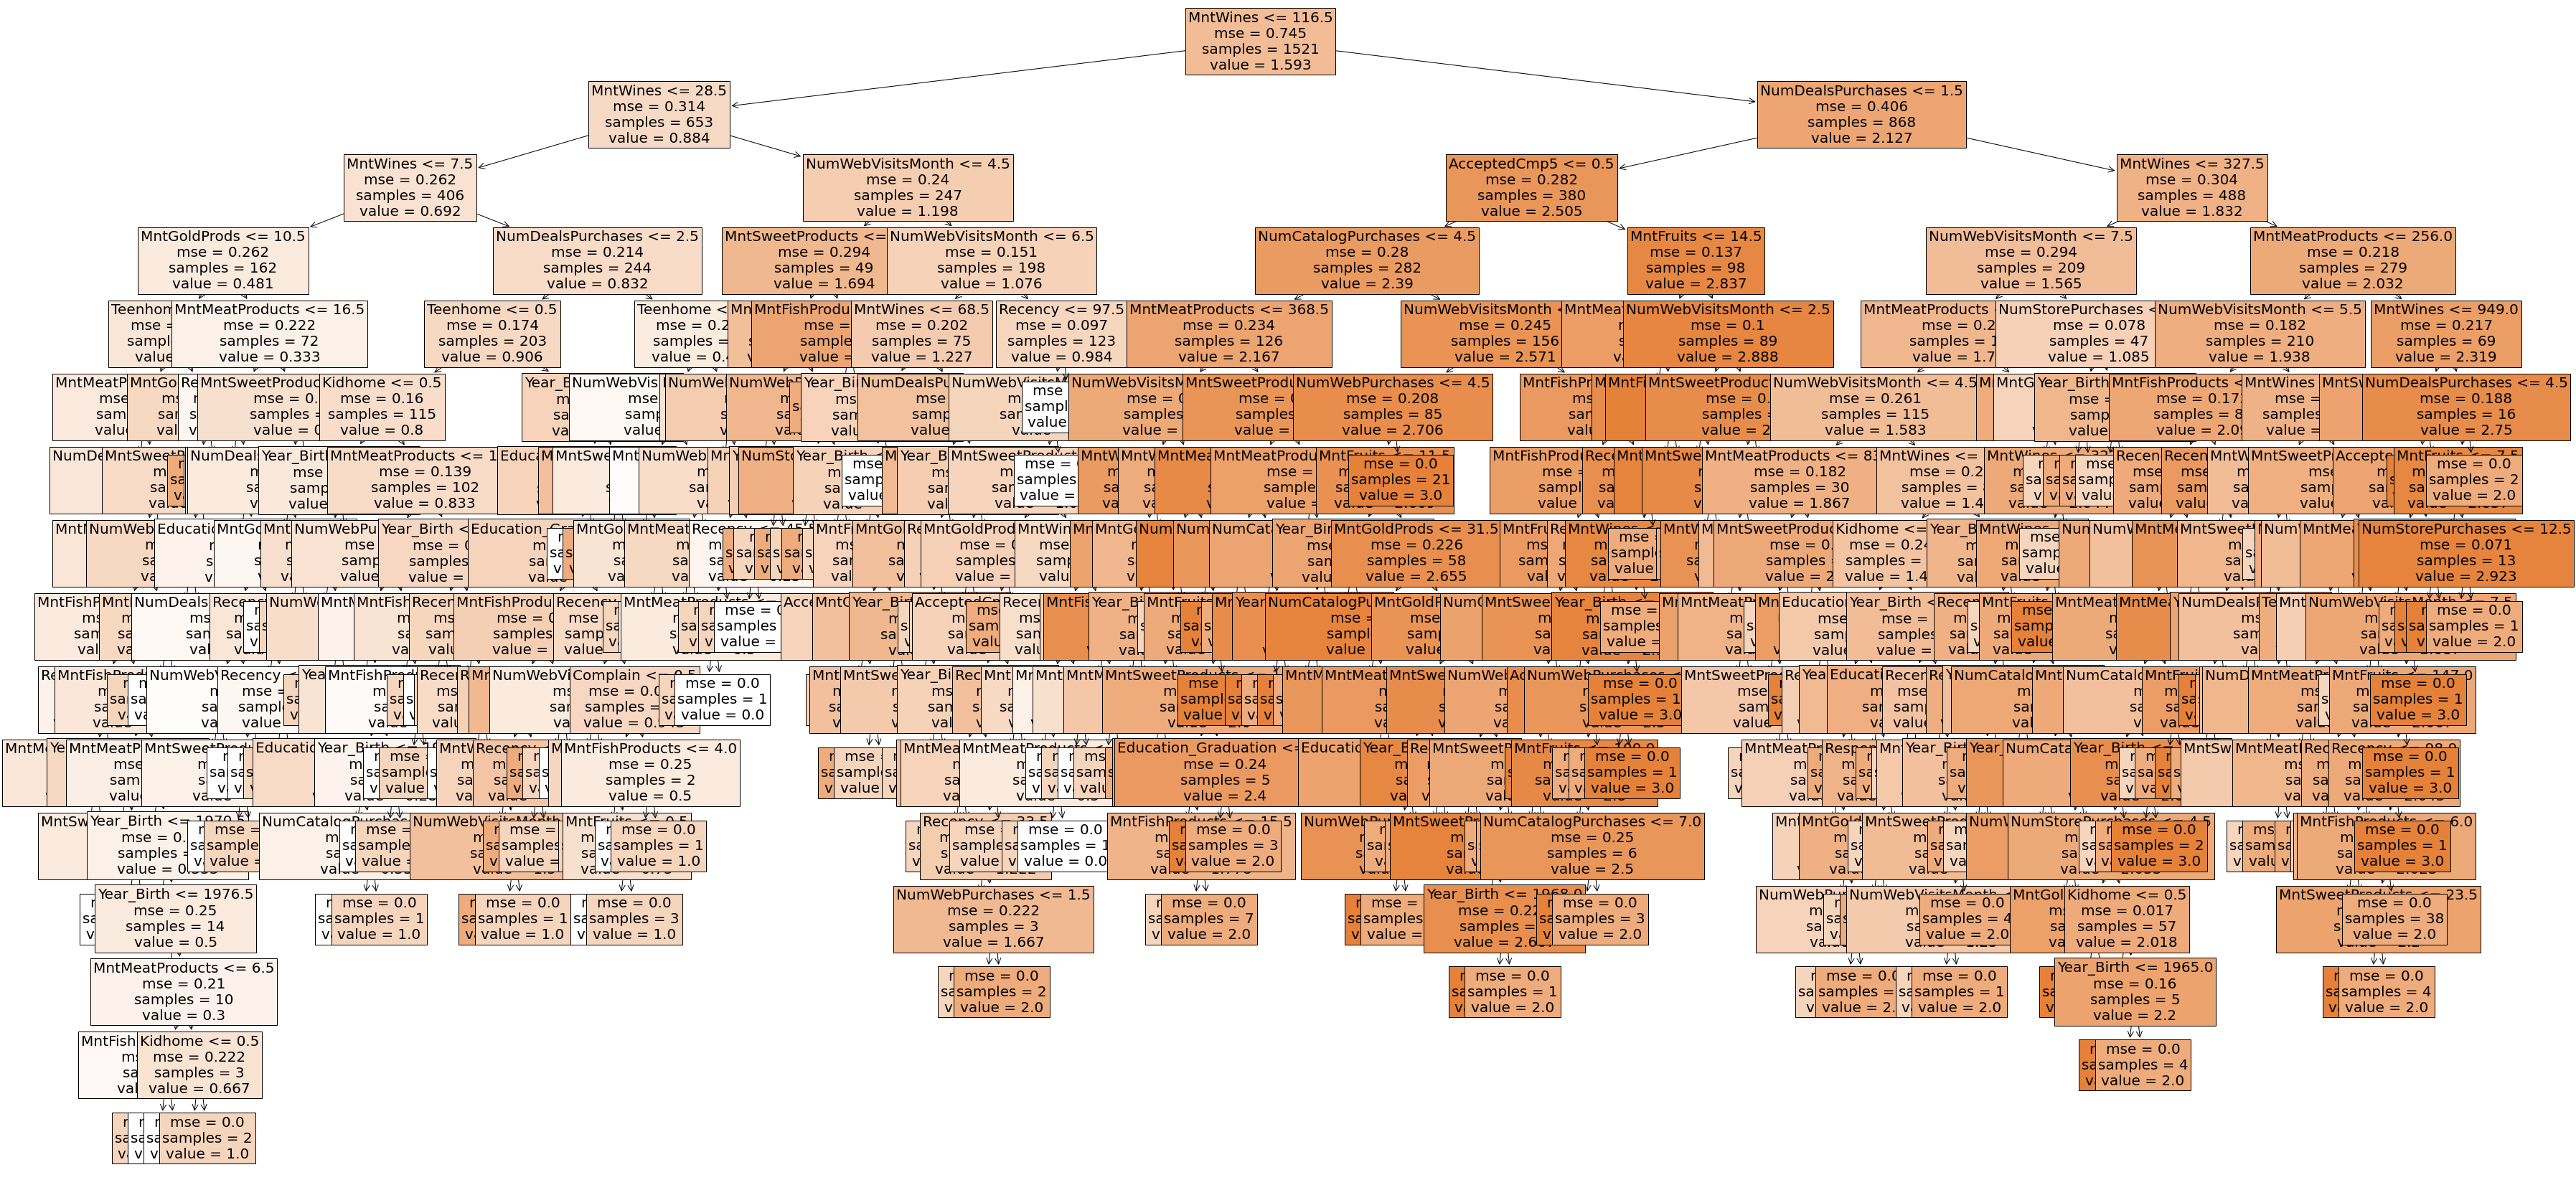

In [43]:
fig = plt.figure(figsize=(60,30))
tree.plot_tree(reg_tree,feature_names= x.columns,class_names=[''], fontsize = 20, filled=True)
plt.show()

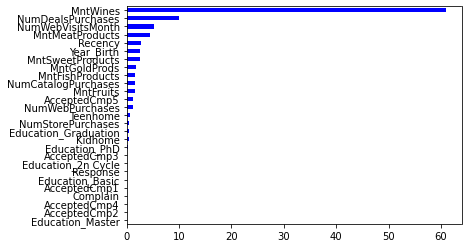

In [44]:
#Code from Dr. Rimal's DATA 3550 Dec_Tree_and_Rand_Forest_Regression_Hitters_Data_Notebook_1_1.ipynb lecture
#See what predictors should be kept for the decision tree and which ones should be removed
importance = pd.DataFrame({'importance':reg_tree.feature_importances_* 100}, index = x.columns)
importance.sort_values('importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'b',)
plt.gca().legend_= None

### All of the products have some significance in the model, so we will look at a DecisionTree with just those 5 categories and the income range and compare the trees

In [45]:
#We will remove all columns from our x predictors except:
       #'MntWines','MntMeatProducts','MntGoldProds','MntSweetProducts','MntFishProducts','MntFruits'
#These appear to be some of the most significant predictors to our tree
#Furthermore, we want to find out if we can predict Income_Range from just these purchased items
customers.drop(customers.columns.difference(['Income_Range','MntWines','MntMeatProducts','MntGoldProds',
                                                    'MntSweetProducts','MntFishProducts','MntFruits']), 1, inplace=True)

In [46]:
#copy the customers dataframe to customers2
customers2 = customers.copy()

In [47]:
# Create target variable (remains unchanged)
y1 = customers2.Income_Range
# Dropping the target variable to create the matrix of predictors x1 with just those above selected variables
x1 = customers2.drop('Income_Range', axis = 1)
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 5524 to 9405
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2173 non-null   int64
 1   MntFruits         2173 non-null   int64
 2   MntMeatProducts   2173 non-null   int64
 3   MntFishProducts   2173 non-null   int64
 4   MntSweetProducts  2173 non-null   int64
 5   MntGoldProds      2173 non-null   int64
dtypes: int64(6)
memory usage: 118.8 KB


In [48]:
# Split this new data set into a training set and a test set in which training set consists of 70% of the data and the remaining data on the test set.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [49]:
y1_test.value_counts()

1    245
2    232
3    111
0     64
Name: Income_Range, dtype: int64

In [50]:
#Begin creating second regression decision tree
reg_tree = DecisionTreeRegressor()
reg_tree = reg_tree.fit(x1_train, y1_train)

In [51]:
# Training accuracy of our 'improved' decision tree
score_train = reg_tree.score(x1_train, y1_train)
print(score_train)
print("")

1.0



In [52]:
# Calculating testing accuracy of our 'improved' decision tree
score_test = reg_tree.score(x1_test, y1_test)
print(score_test)
print("")

0.5125491857860645



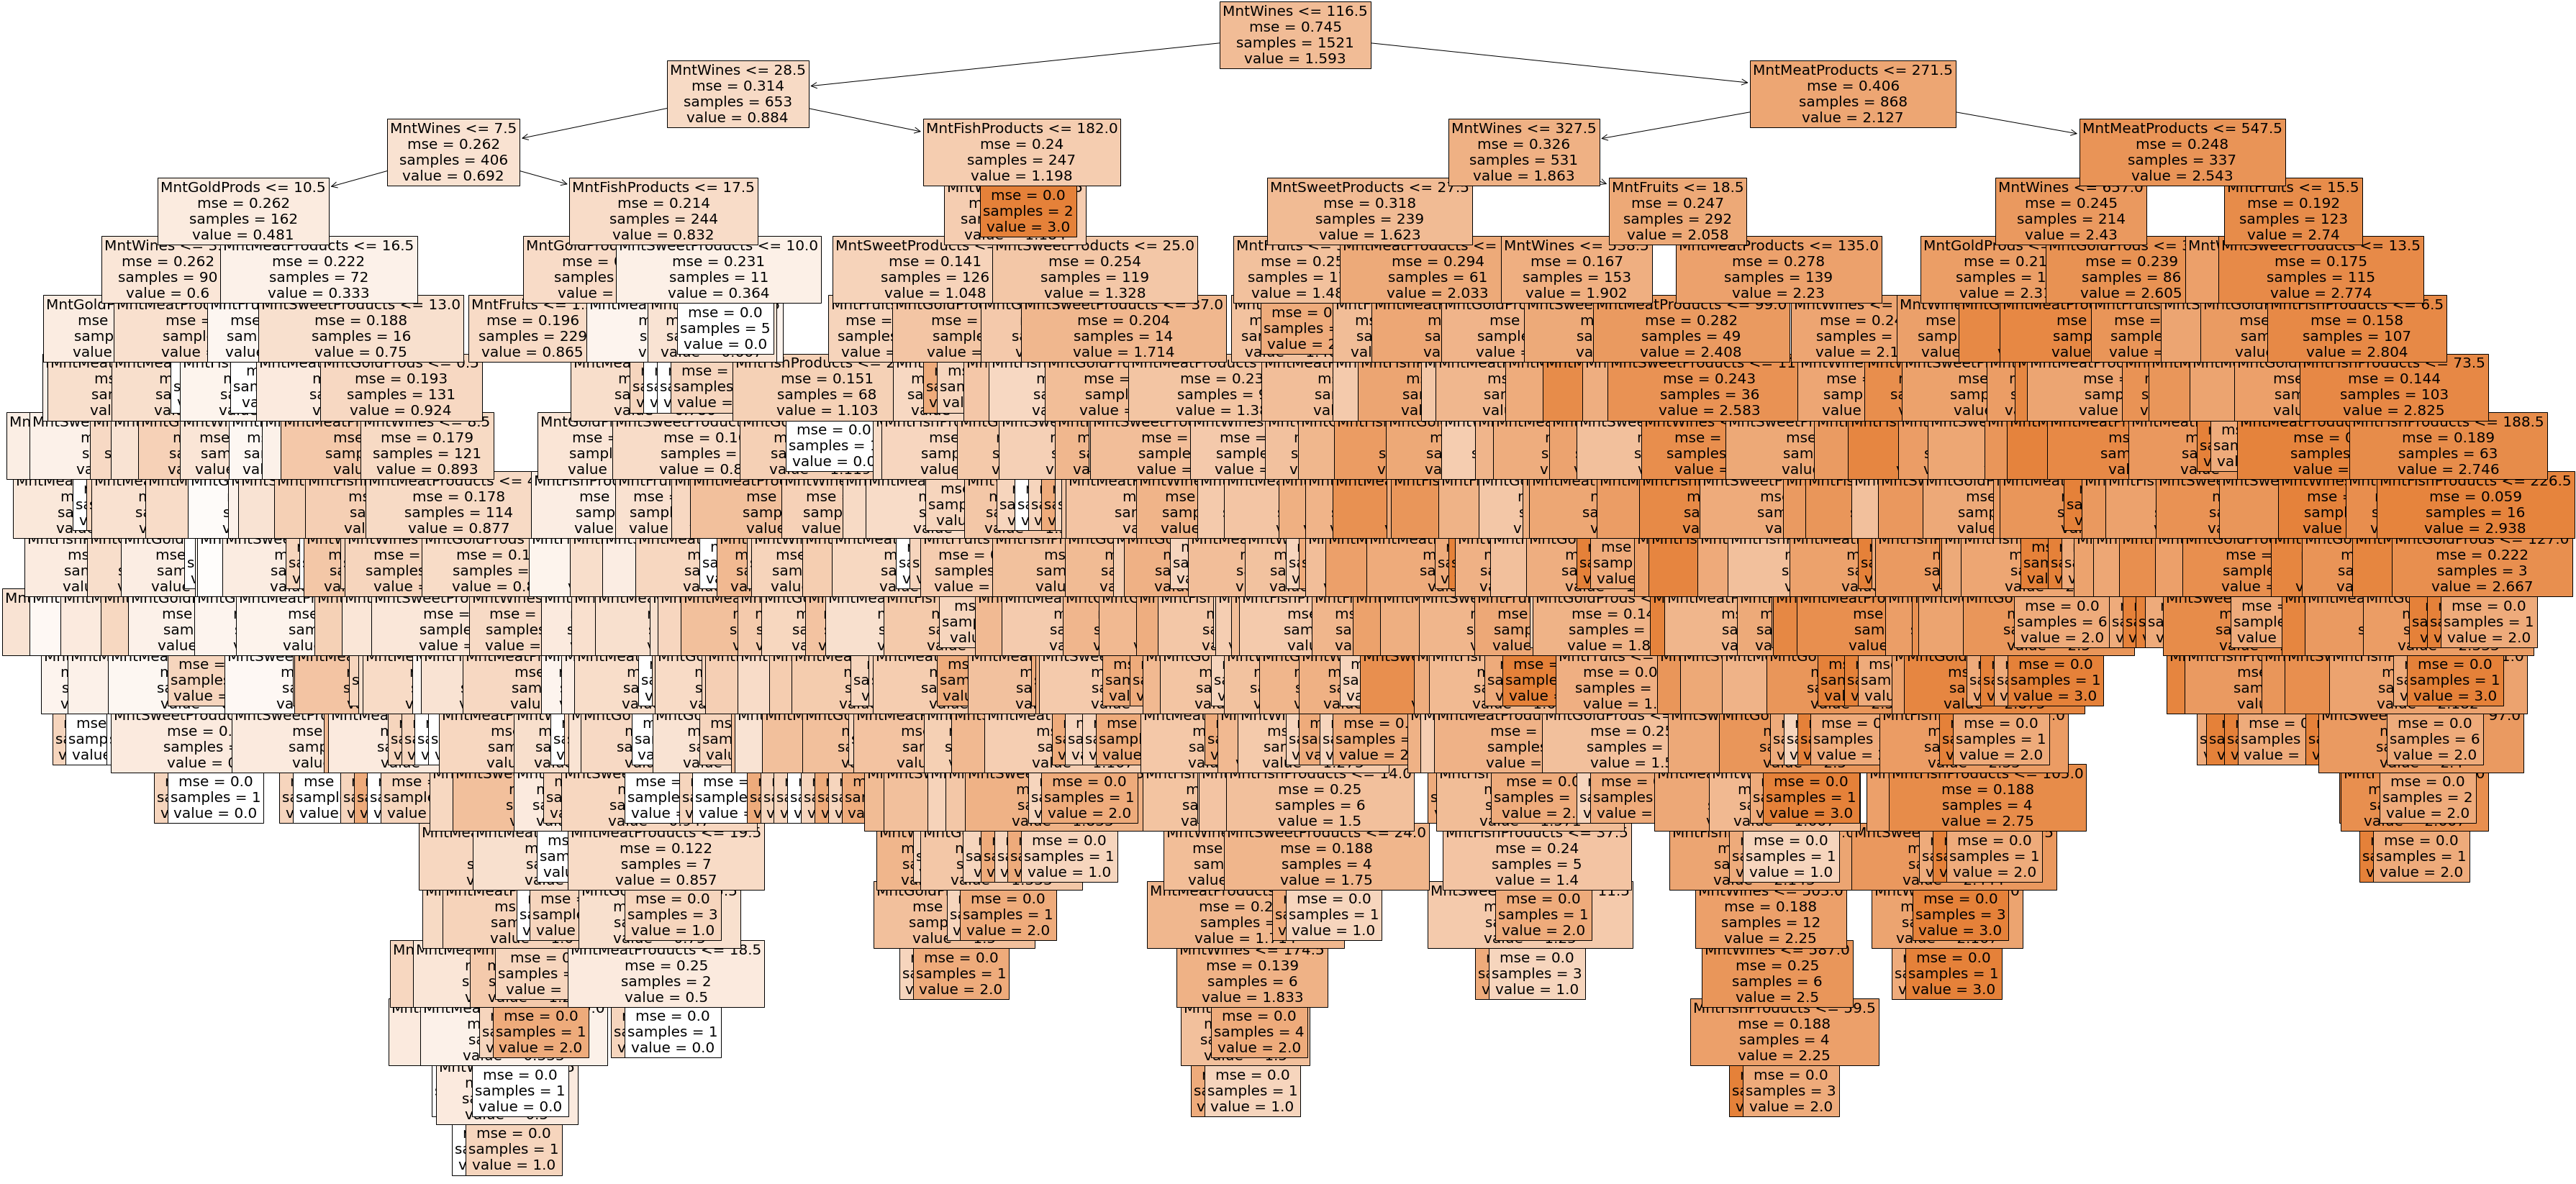

In [53]:
fig = plt.figure(figsize=(60,30))
tree.plot_tree(reg_tree,feature_names= x1.columns,class_names=[''], fontsize = 20, filled=True)
plt.show()

### The tree with only the 5 products for each customer income range does not fit as well as the tree with all predictors for income range, but the fit percentage is a difference of < 10% so it is still a decent model to use

In [54]:
y1_pred = reg_tree.predict(x1_test) 

# Create a confusion matrix showing the predicted and true results of this 'improved' tree
cm = confusion_matrix(y1_test, y1_pred)

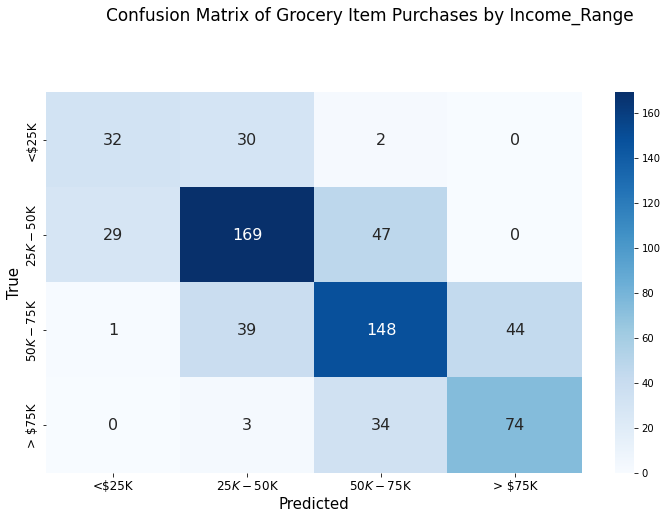

In [55]:
# Create a heat map showing the results of the confusion matrix for the improved tree
fig, axes = plt.subplots(nrows=1, ncols=1, sharex = True, figsize=(12, 7))
fig.suptitle('Confusion Matrix of Grocery Item Purchases by Income_Range', 
             fontsize=17, y = 1.05)
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax, fmt = "g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['<$25K', '$25K-$50K','$50K-$75K','> $75K'], fontsize=12)
ax.yaxis.set_ticklabels(['<$25K', '$25K-$50K','$50K-$75K','> $75K'], fontsize=12, va ='center')
plt.show()

In [56]:
# show statistics on our improved decision tree performance
#how accurately is each income range predicted in the model
print("Results from Decision Tree")
print("Report: \n", classification_report(y1_test, y1_pred, 
                    target_names = ['<$25K', '$25K-$50K','$50K-$75K','> $75K'], digits = 3)) 

Results from Decision Tree
Report: 
               precision    recall  f1-score   support

       <$25K      0.516     0.500     0.508        64
   $25K-$50K      0.701     0.690     0.695       245
   $50K-$75K      0.641     0.638     0.639       232
      > $75K      0.627     0.667     0.646       111

    accuracy                          0.649       652
   macro avg      0.621     0.624     0.622       652
weighted avg      0.649     0.649     0.649       652



#### The model was convincingly accurate at predicting customer incomes for all of our ranges even though both trees are trees that overfit the data, the group could work on this more in the future to improve the analysis

### Use bar graphs to see which products were most popular among the income ranges as opposed to predictions from the above models

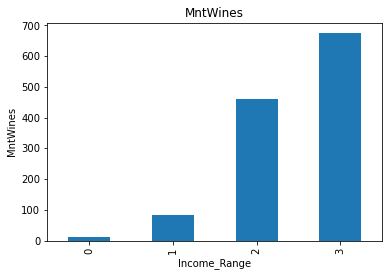

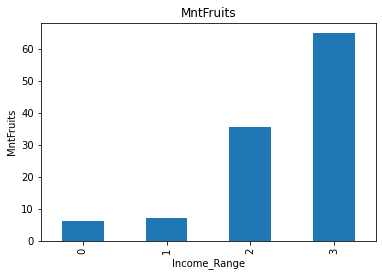

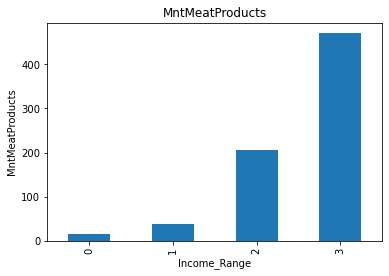

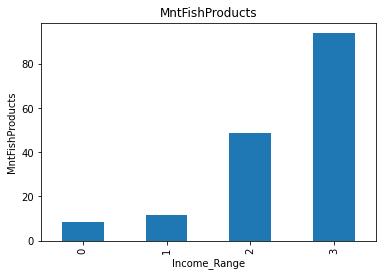

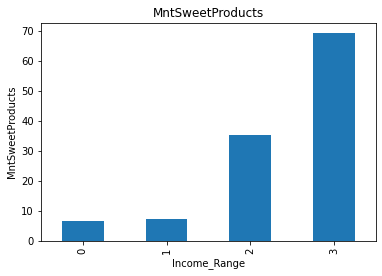

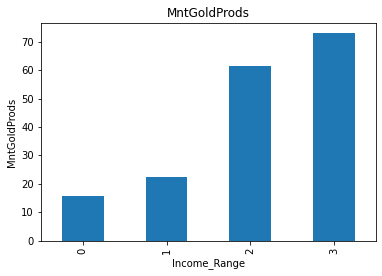

In [57]:
#Create bar graphs for each store product distributed by income range
for column in customers[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]:
    data=customers.copy()
    data.groupby('Income_Range')[column].mean().plot.bar()
    plt.xlabel('Income_Range')
    plt.ylabel(column)
    plt.title(column)
    plt.show()